In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('722').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/11 13:47:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
df = spark.read.load("./dataset/AQUASTAT.csv", format="csv",header = "true")

In [3]:
df.show()

+-----------------------------+-----------+---------------+---+--------------------+--------------------+-------------------+-------------------+------+--------------------+-------+---------+
|Country & Variable (Combined)|    Country|         Region|M49|            Variable|           Variables|               Unit|              Units|Symbol|  Symbol Description|Symbols|     2019|
+-----------------------------+-----------+---------------+---+--------------------+--------------------+-------------------+-------------------+------+--------------------+-------+---------+
|         Afghanistan, GDP ...|Afghanistan|  Southern Asia|  4|GDP per capita (c...|      GDP per capita|(current US$/inhab)|(current US$/inhab)|   I  |Imputed (carry fo...|    I  |   563.98|
|         Afghanistan, Tota...|Afghanistan|  Southern Asia|  4|Total dam capacit...|  Total dam capacity|              (km3)|              (km3)|   E  |Estimate either c...|    E  |     2.01|
|         Afghanistan, Tota...|Afghanist

In [6]:
df.columns

['Country & Variable (Combined)',
 'Country',
 'Region',
 'M49',
 'Variable',
 'Variables',
 'Unit',
 'Units',
 'Symbol',
 'Symbol Description',
 'Symbols',
 '2019']

In [7]:
df.describe().show()

+-------+-----------------------------+-----------+--------------------+-----------------+--------------------+--------------------+------------+------------+------+--------------------+-------+------------------+
|summary|Country & Variable (Combined)|    Country|              Region|              M49|            Variable|           Variables|        Unit|       Units|Symbol|  Symbol Description|Symbols|              2019|
+-------+-----------------------------+-----------+--------------------+-----------------+--------------------+--------------------+------------+------------+------+--------------------+-------+------------------+
|  count|                          937|        937|                 937|              937|                 937|                 937|         937|         937|   937|                 937|    937|               937|
|   mean|                         null|       null|                null|432.9413020277481|                null|                null|        null

In [8]:
df.printSchema()

root
 |-- Country & Variable (Combined): string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- M49: string (nullable = true)
 |-- Variable: string (nullable = true)
 |-- Variables: string (nullable = true)
 |-- Unit: string (nullable = true)
 |-- Units: string (nullable = true)
 |-- Symbol: string (nullable = true)
 |-- Symbol Description: string (nullable = true)
 |-- Symbols: string (nullable = true)
 |-- 2019: string (nullable = true)



In [9]:
df.na.drop().show()

+-----------------------------+-----------+---------------+---+--------------------+--------------------+-------------------+-------------------+------+--------------------+-------+---------+
|Country & Variable (Combined)|    Country|         Region|M49|            Variable|           Variables|               Unit|              Units|Symbol|  Symbol Description|Symbols|     2019|
+-----------------------------+-----------+---------------+---+--------------------+--------------------+-------------------+-------------------+------+--------------------+-------+---------+
|         Afghanistan, GDP ...|Afghanistan|  Southern Asia|  4|GDP per capita (c...|      GDP per capita|(current US$/inhab)|(current US$/inhab)|   I  |Imputed (carry fo...|    I  |   563.98|
|         Afghanistan, Tota...|Afghanistan|  Southern Asia|  4|Total dam capacit...|  Total dam capacity|              (km3)|              (km3)|   E  |Estimate either c...|    E  |     2.01|
|         Afghanistan, Tota...|Afghanist

In [10]:
df.count()

937

In [11]:
df.na.drop().count()

937

In [13]:
dm = spark.read.load("./dataset/AQUASTAT.csv", format="csv",header = "true")

In [14]:
dm1 = dm.na.drop()
dm1.count()

937

In [15]:
dm.count()

937

In [16]:
dm1.show()

+-----------------------------+-----------+---------------+---+--------------------+--------------------+-------------------+-------------------+------+--------------------+-------+---------+
|Country & Variable (Combined)|    Country|         Region|M49|            Variable|           Variables|               Unit|              Units|Symbol|  Symbol Description|Symbols|     2019|
+-----------------------------+-----------+---------------+---+--------------------+--------------------+-------------------+-------------------+------+--------------------+-------+---------+
|         Afghanistan, GDP ...|Afghanistan|  Southern Asia|  4|GDP per capita (c...|      GDP per capita|(current US$/inhab)|(current US$/inhab)|   I  |Imputed (carry fo...|    I  |   563.98|
|         Afghanistan, Tota...|Afghanistan|  Southern Asia|  4|Total dam capacit...|  Total dam capacity|              (km3)|              (km3)|   E  |Estimate either c...|    E  |     2.01|
|         Afghanistan, Tota...|Afghanist

In [17]:
dm.show()

+-----------------------------+-----------+---------------+---+--------------------+--------------------+-------------------+-------------------+------+--------------------+-------+---------+
|Country & Variable (Combined)|    Country|         Region|M49|            Variable|           Variables|               Unit|              Units|Symbol|  Symbol Description|Symbols|     2019|
+-----------------------------+-----------+---------------+---+--------------------+--------------------+-------------------+-------------------+------+--------------------+-------+---------+
|         Afghanistan, GDP ...|Afghanistan|  Southern Asia|  4|GDP per capita (c...|      GDP per capita|(current US$/inhab)|(current US$/inhab)|   I  |Imputed (carry fo...|    I  |   563.98|
|         Afghanistan, Tota...|Afghanistan|  Southern Asia|  4|Total dam capacit...|  Total dam capacity|              (km3)|              (km3)|   E  |Estimate either c...|    E  |     2.01|
|         Afghanistan, Tota...|Afghanist

In [18]:
# dm.na.fill("NO VALUE", subset=['Employee_Name'])
# dm.show

# dm2 = dm.na.fill("NO VALUE", subset=['Employee_Name'])
# dm2.show()

# dm.na.fill("NO VALUE", subset=['Employee_Name']).show()

下面是用PySpark，根据Lab 9那个PDF

原始代码

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [20]:
csv_data = pd.read_csv('./dataset/AQUASTAT.csv')

country_list = []
variables_lsit = []
region_lsit = []
for i in range(len(csv_data)):
    if csv_data['Country'][i] not in country_list:
        country_list.append(csv_data['Country'][i])
    
    if csv_data['Variables'][i] not in variables_lsit:
        variables_lsit.append(csv_data['Variables'][i])
        
    if csv_data['Region'][i] not in region_lsit:
        region_lsit.append(csv_data['Region'][i])

In [21]:
country_var = {}
for country in country_list:
    dict1 = {}
    for i in range(len(csv_data)):
        if csv_data['Country'][i] == country:
            # print(country)
            
            for r in region_lsit:
                if csv_data['Region'][i] == r:
                    dict1['Region'] = r
            
            for v in variables_lsit:
                if csv_data['Variables'][i] == v:
                    # print(v)
                    dict1[v]=csv_data['2019'][i].replace(',','')
    # print(dict1)
    country_var[country] = dict1

colums = []
for key, value in country_var.items():
    # print(key)
    # print(value)
    
    colum = []
    colum.append(key)
    colum.append(value['Region'])
    # print(colum)
    
    # print(list(value.keys()))
    
    for v in variables_lsit:
        # print(v)
        if v in list(value.keys()):
            # print(value[v])
            colum.append(float(value[v]))
        else:
            colum.append('NULL')   
    
    # print(colum)
    
    colums.append(colum)

colum_name = ['Country', 'Region']
# colum_name = colum_name.append(variables_lsit)
for v in variables_lsit:
    colum_name.append(v)

In [22]:
# histogram show
csv_data = pd.read_csv('./dataset/data_for_analysis.csv')

def histogram(factor):
    # [Sub-Saharan Africa, South Asia, North America, Middle East and North Africa, Latin America and the Caribbean, Europe and Central Asia, East Asia and the Pacific Rim]
    data = {
        'Sub-Saharan Africa':0,
        'South Asia':0,
        'North America':0,
        'Middle East and North Africa':0,
        'Latin America and the Caribbean':0,
        'Europe and Central Asia':0,
        'East Asia and the Pacific Rim':0}
    
    data2 = {
        'No Poverty Country':0,
        'Slightly poor Country':0,
        'Middle Poverty Country':0,
        'Poor Country':0}
    
    poor_country_number = [0,0,0,0]
    for i in range(len(csv_data)): # 取每一行
        if csv_data['Poverty Level'][i]=='No Poverty Country':
            poor_country_number[0] = poor_country_number[0]+1
            data2['No Poverty Country'] = data2['No Poverty Country']+csv_data[factor][i]
        elif csv_data['Poverty Level'][i]=='Slightly poor Country':
            poor_country_number[1] = poor_country_number[1]+1
            data2['Slightly poor Country'] = data2['Slightly poor Country']+csv_data[factor][i]
        elif csv_data['Poverty Level'][i]=='Middle Poverty Country':
            poor_country_number[2] = poor_country_number[2]+1
            data2['Middle Poverty Country'] = data2['Middle Poverty Country']+csv_data[factor][i]
        elif csv_data['Poverty Level'][i]=='Poor Country':
            poor_country_number[3] = poor_country_number[3]+1
            data2['Poor Country'] = data2['Poor Country']+csv_data[factor][i]
        
    data2['No Poverty Country'] = data2['No Poverty Country']/poor_country_number[0]
    data2['Slightly poor Country'] = data2['Slightly poor Country']/poor_country_number[1]
    data2['Middle Poverty Country'] = data2['Middle Poverty Country']/poor_country_number[2]
    data2['Poor Country'] = data2['Poor Country']/poor_country_number[3]
       
    
    region_country_number = [0,0,0,0,0,0,0]
    for i in range(len(csv_data)):
        if csv_data['Region'][i]=='Sub-Saharan Africa':
            region_country_number[0] = region_country_number[0]+1
            data['Sub-Saharan Africa'] = data['Sub-Saharan Africa']+csv_data[factor][i]
        elif csv_data['Region'][i]=='South Asia':
            region_country_number[1] = region_country_number[1]+1
            data['South Asia'] = data['South Asia']+csv_data[factor][i]
        elif csv_data['Region'][i]=='North America':
            region_country_number[2] = region_country_number[2]+1
            data['North America'] = data['North America']+csv_data[factor][i]
        elif csv_data['Region'][i]=='Middle East and North Africa':
            region_country_number[3] = region_country_number[3]+1
            data['Middle East and North Africa'] = data['Middle East and North Africa']+csv_data[factor][i]
        elif csv_data['Region'][i]=='Latin America and the Caribbean':
            region_country_number[4] = region_country_number[4]+1
            data['Latin America and the Caribbean'] = data['Latin America and the Caribbean']+csv_data[factor][i]
        elif csv_data['Region'][i]=='Europe and Central Asia':
            region_country_number[5] = region_country_number[5]+1
            data['Europe and Central Asia'] = data['Europe and Central Asia']+csv_data[factor][i]
        elif csv_data['Region'][i]=='East Asia and the Pacific Rim':
            region_country_number[6] = region_country_number[6]+1
            data['East Asia and the Pacific Rim'] = data['East Asia and the Pacific Rim']+csv_data[factor][i]

    data['Sub-Saharan Africa'] = data['Sub-Saharan Africa']/region_country_number[0]
    data['South Asia'] = data['South Asia']/region_country_number[1]
    data['North America'] = data['North America']/region_country_number[2]
    data['Middle East and North Africa'] = data['Middle East and North Africa']/region_country_number[3]
    data['Latin America and the Caribbean'] = data['Latin America and the Caribbean']/region_country_number[4]
    data['Europe and Central Asia'] = data['Europe and Central Asia']/region_country_number[5]
    data['East Asia and the Pacific Rim'] = data['East Asia and the Pacific Rim']/region_country_number[6]

    return region_country_number, poor_country_number, data, data2

In [23]:
def get_pie(factor):
    _, _, data_region, data_poor = histogram(factor)
    region = []
    region_value = []
    for key,value in data_region.items():
        region.append(key)
        region_value.append(value)

    poor = []
    poor_value = []
    for key,value in data_poor.items():
        poor.append(key)
        poor_value.append(value)
        

    fig,axes=plt.subplots(1,2,figsize=(16, 8))#创建画布

    axes[0].pie(region_value,
            labels=region, 
            autopct='%.2f%%'
           )
    axes[0].set_title(factor+" base on region") # 设置标题
    axes[0].axis('equal')#x,y轴刻度一致，保证饼图为圆形

    axes[1].pie(poor_value,
            labels=poor, 
            autopct='%.2f%%'
           )
    axes[1].set_title(factor+" base on region") # 设置标题
    axes[1].axis('equal')#x,y轴刻度一致，保证饼图为圆形


    plt.show()

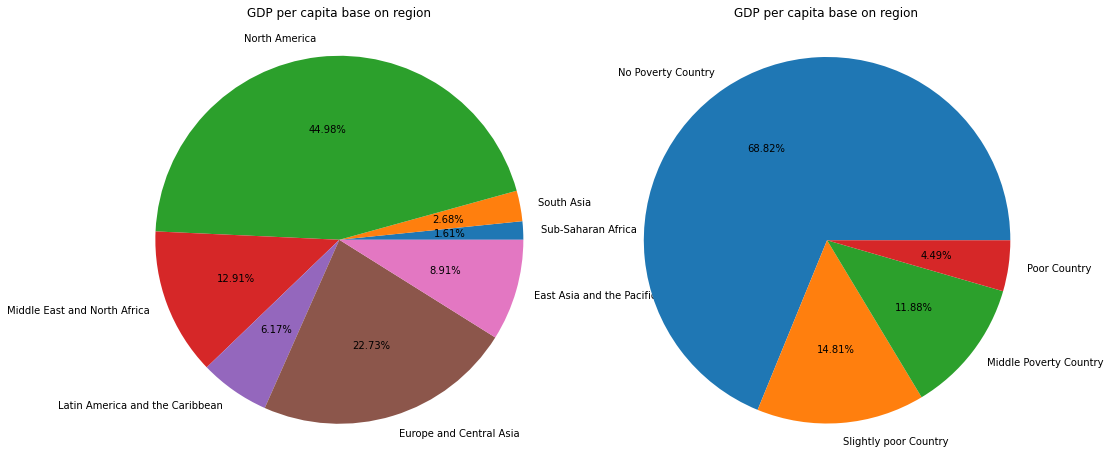

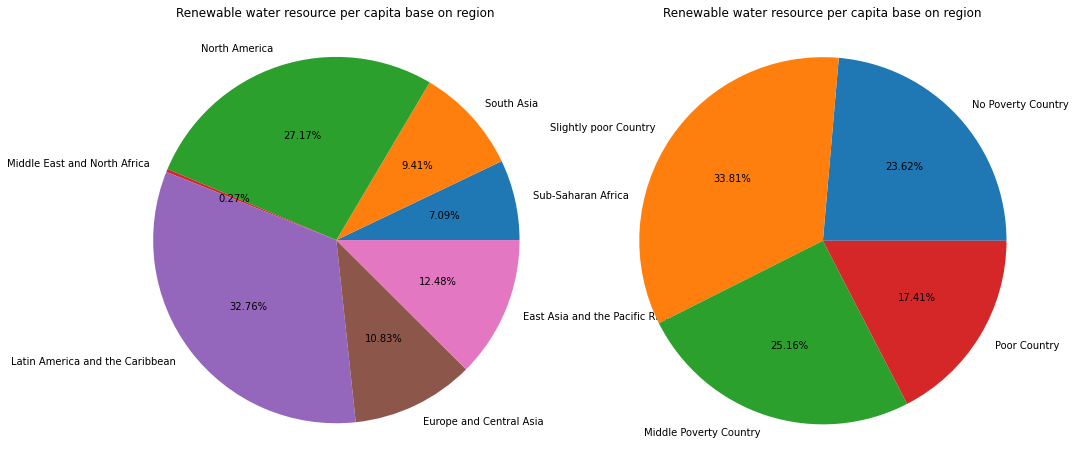

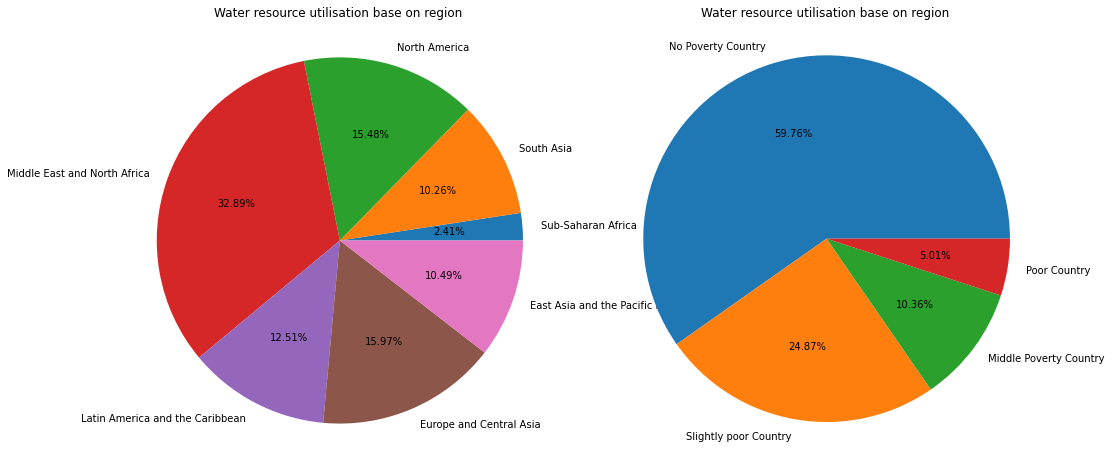

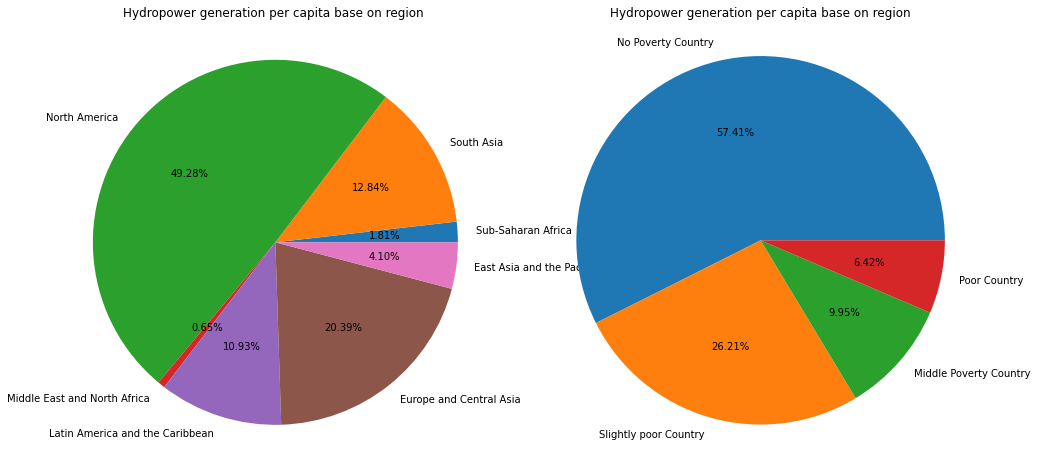

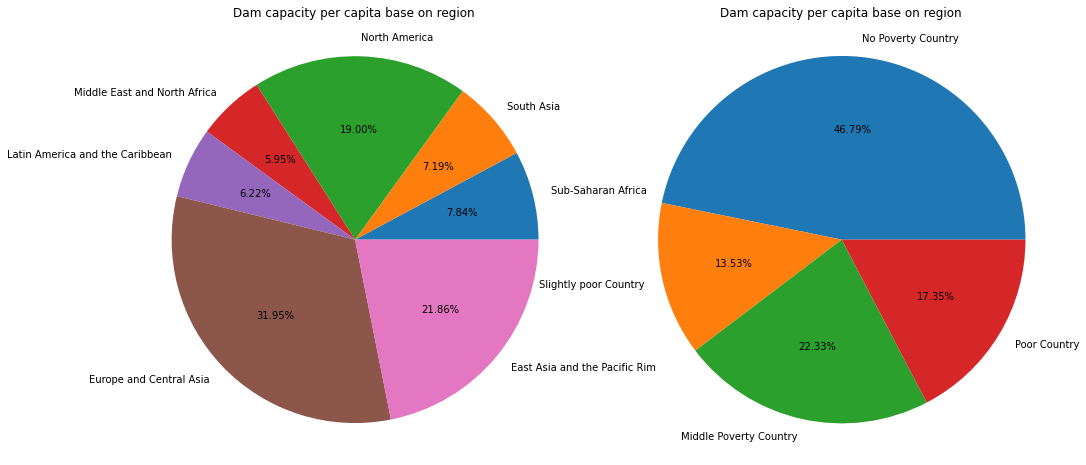

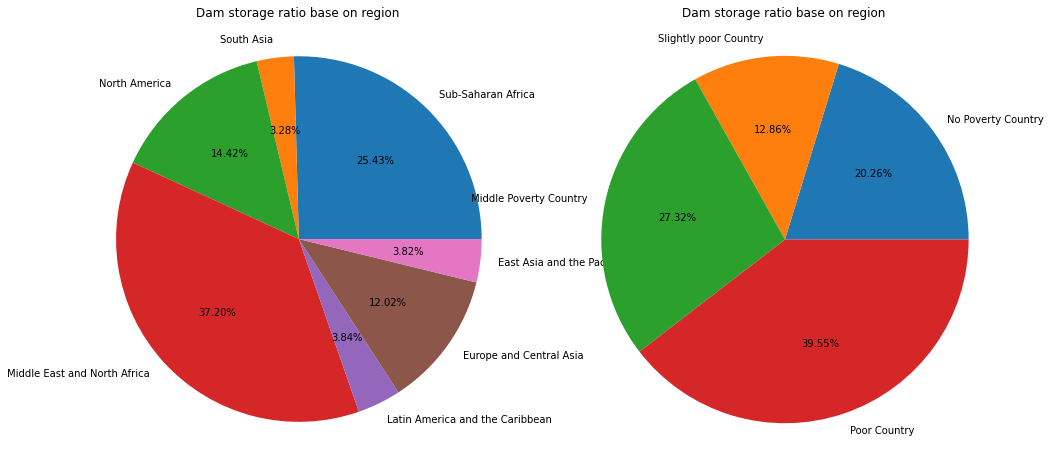

In [24]:
get_pie('GDP per capita')
get_pie('Renewable water resource per capita')
get_pie('Water resource utilisation')
get_pie('Hydropower generation per capita')
get_pie('Dam capacity per capita')
get_pie('Dam storage ratio')

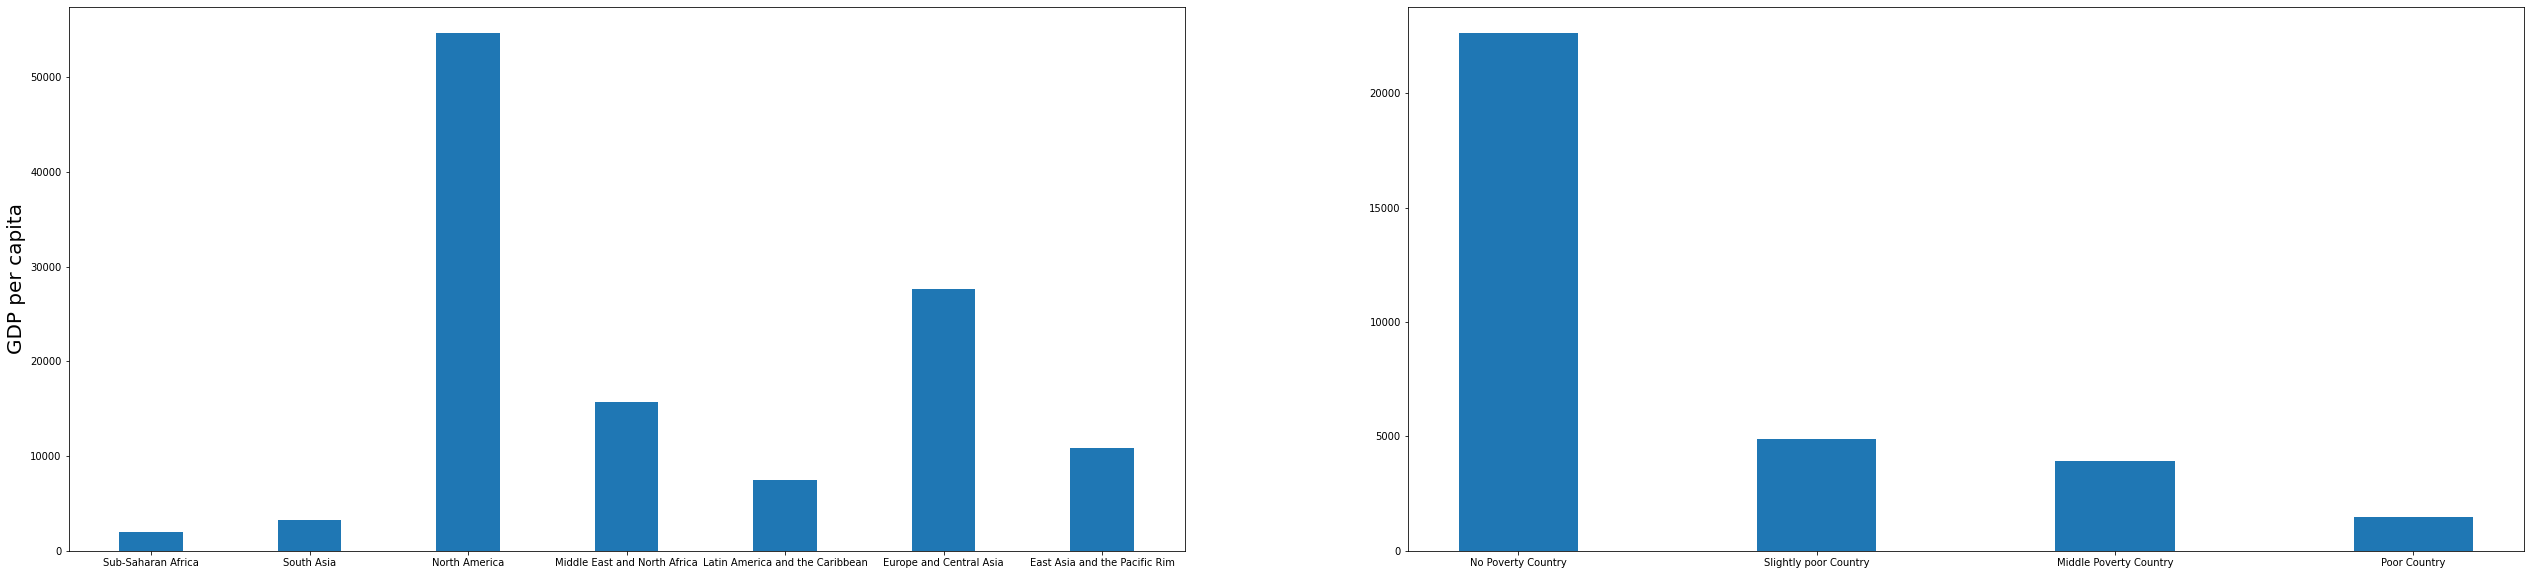

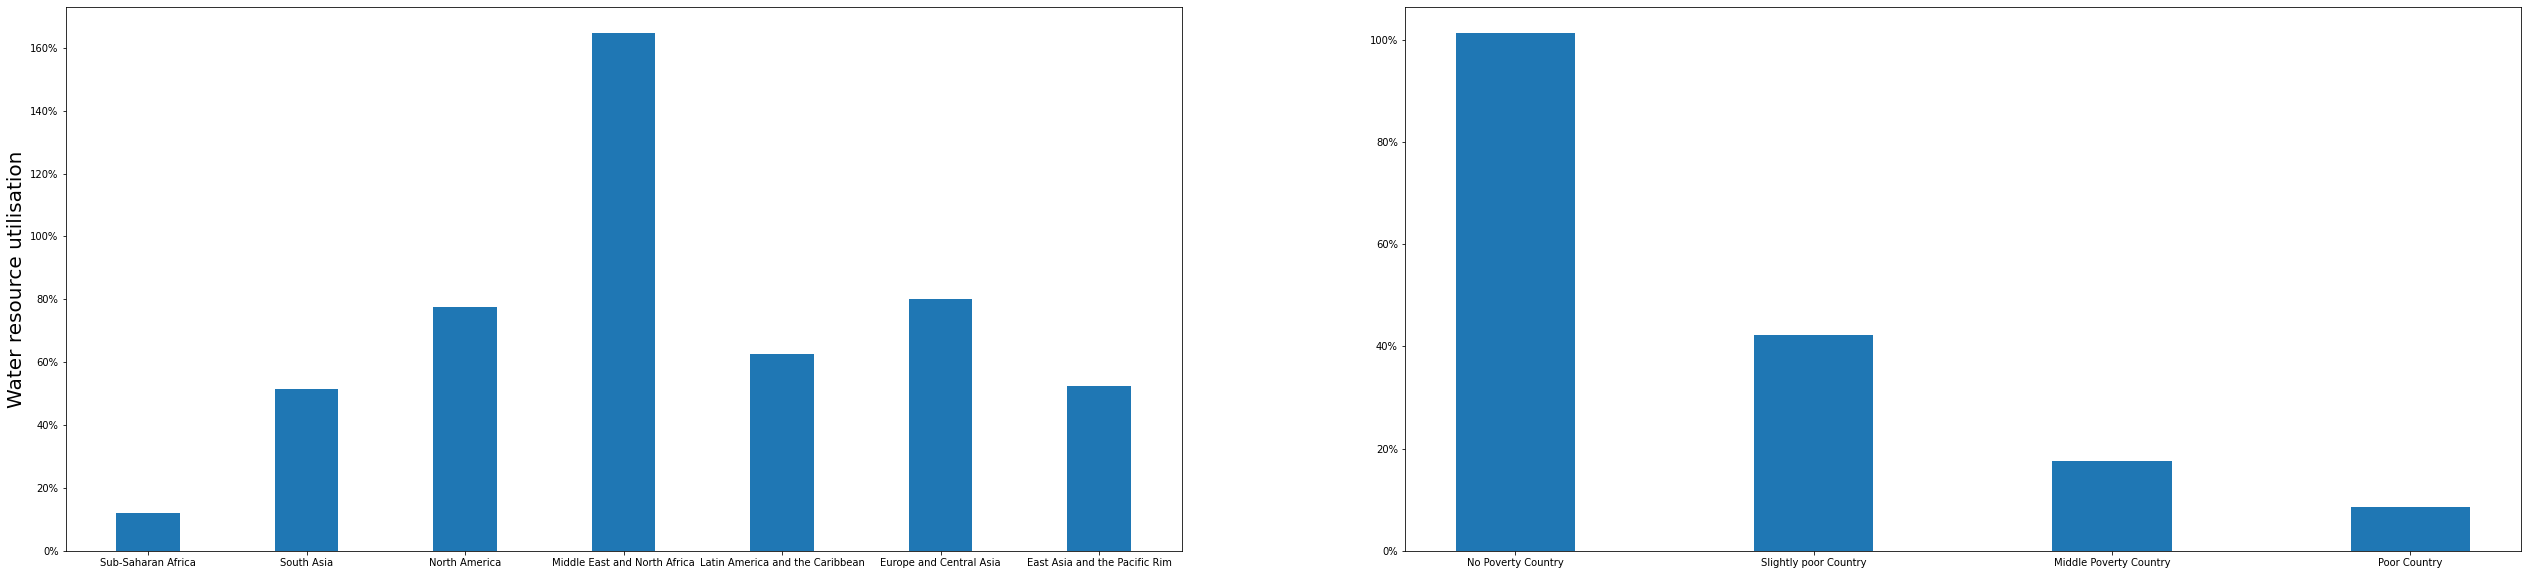

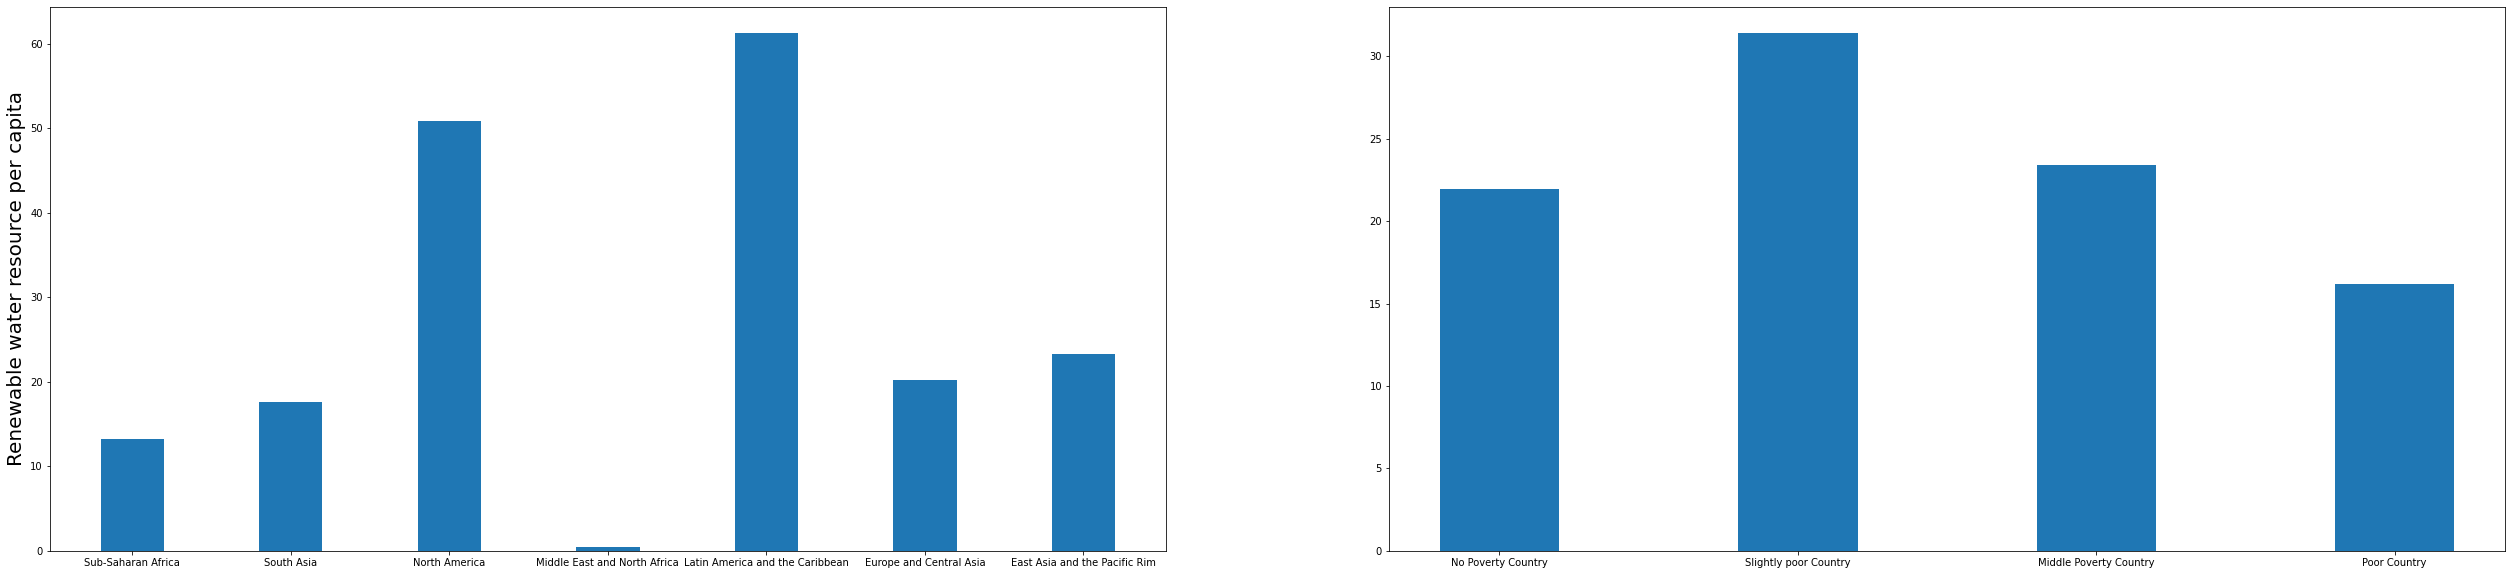

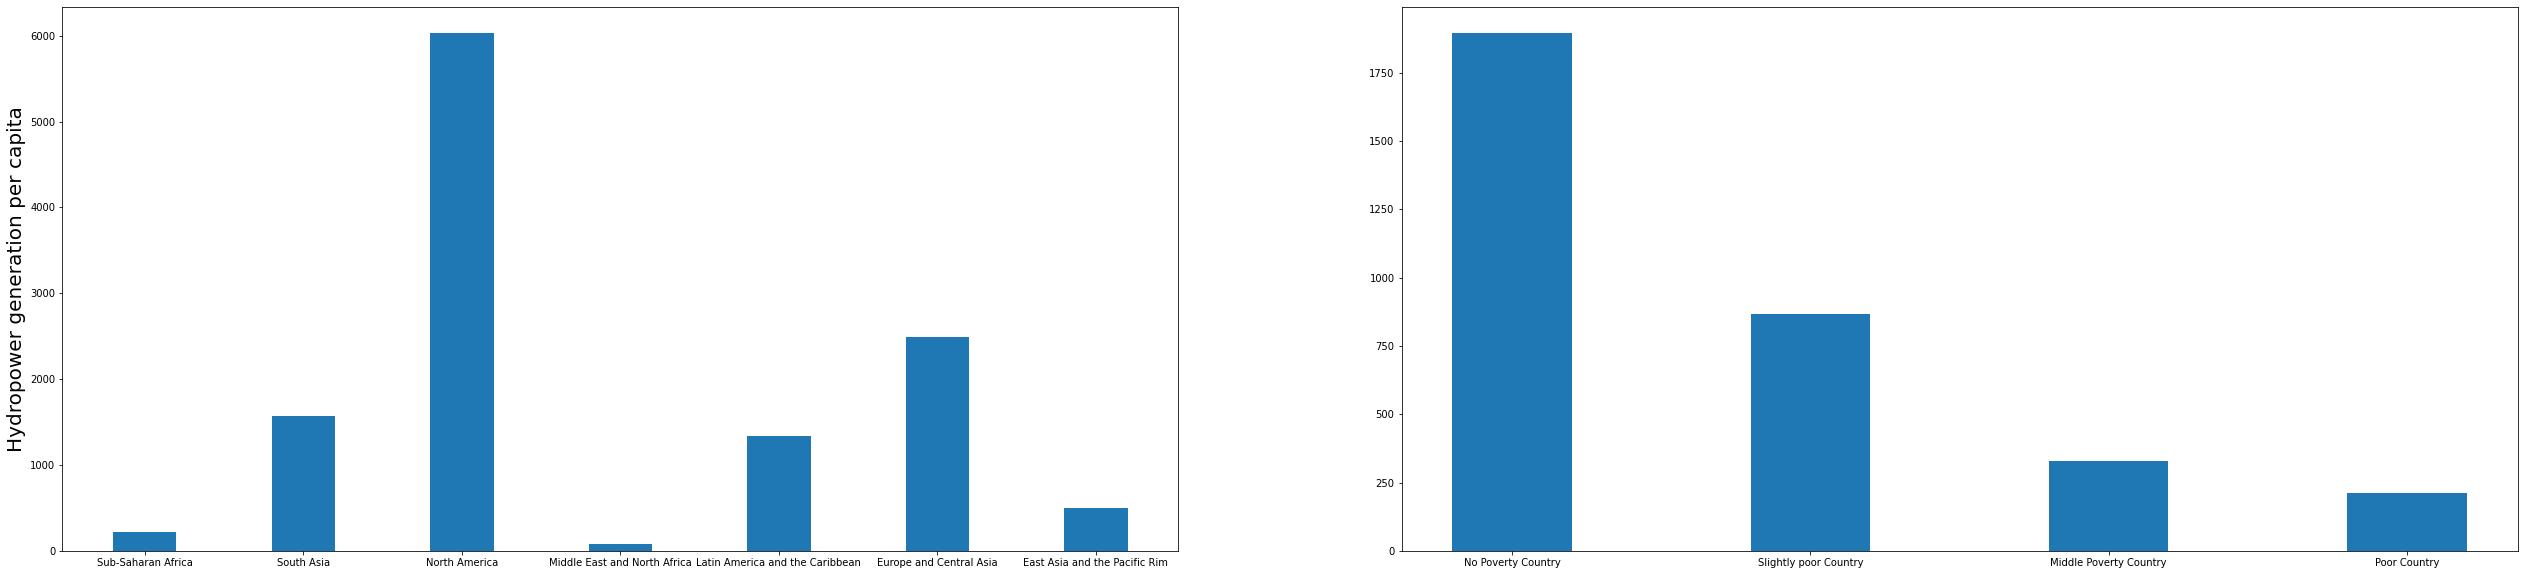

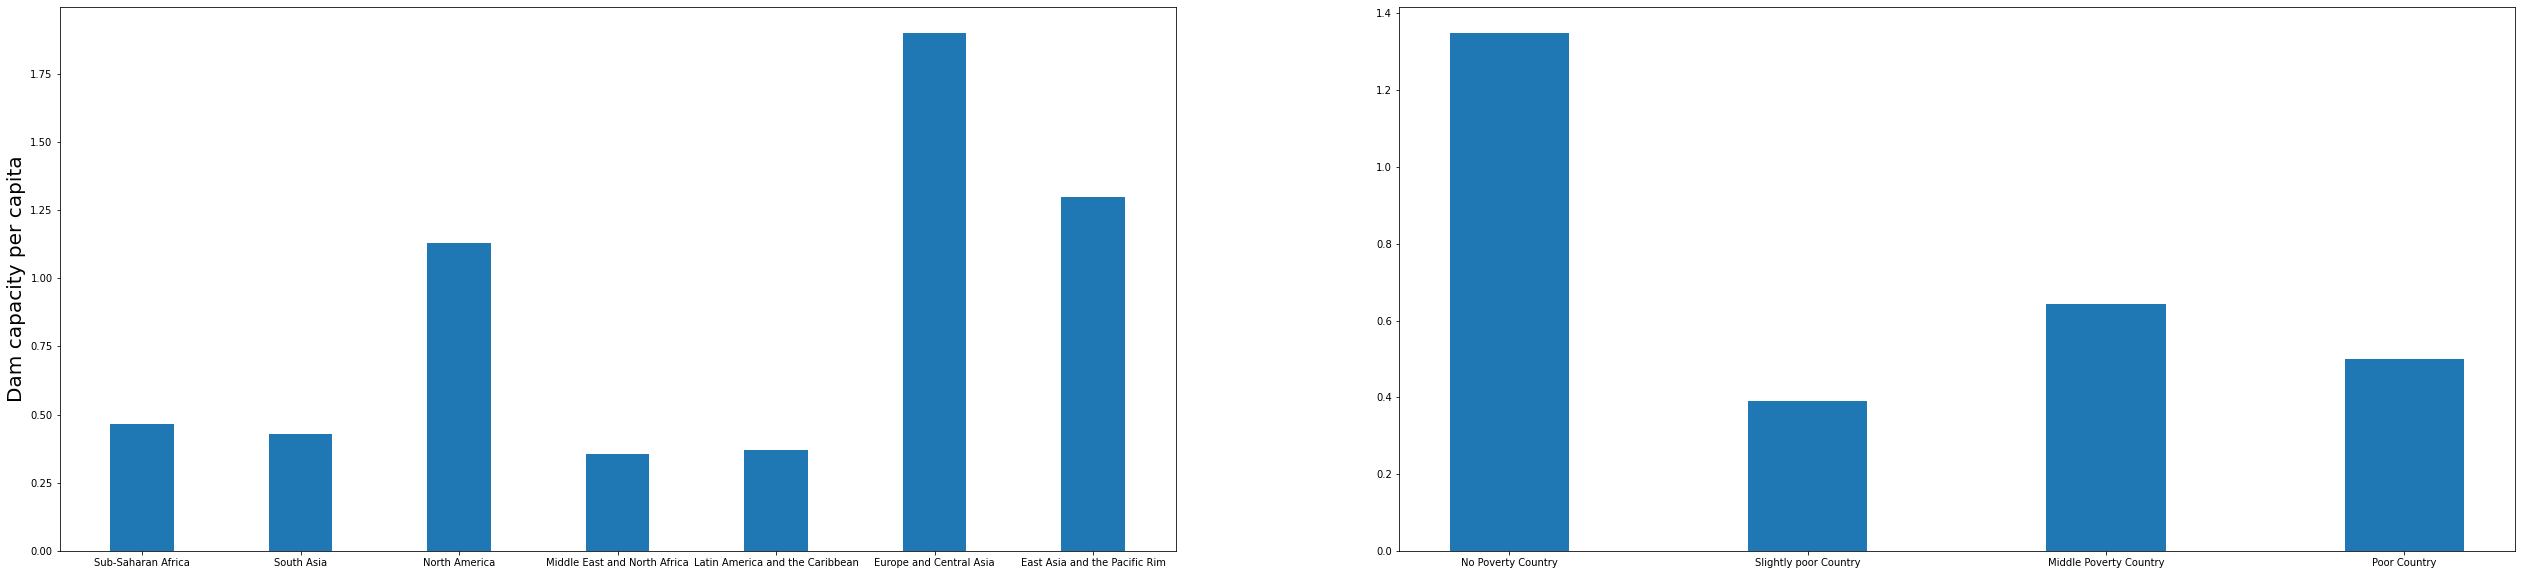

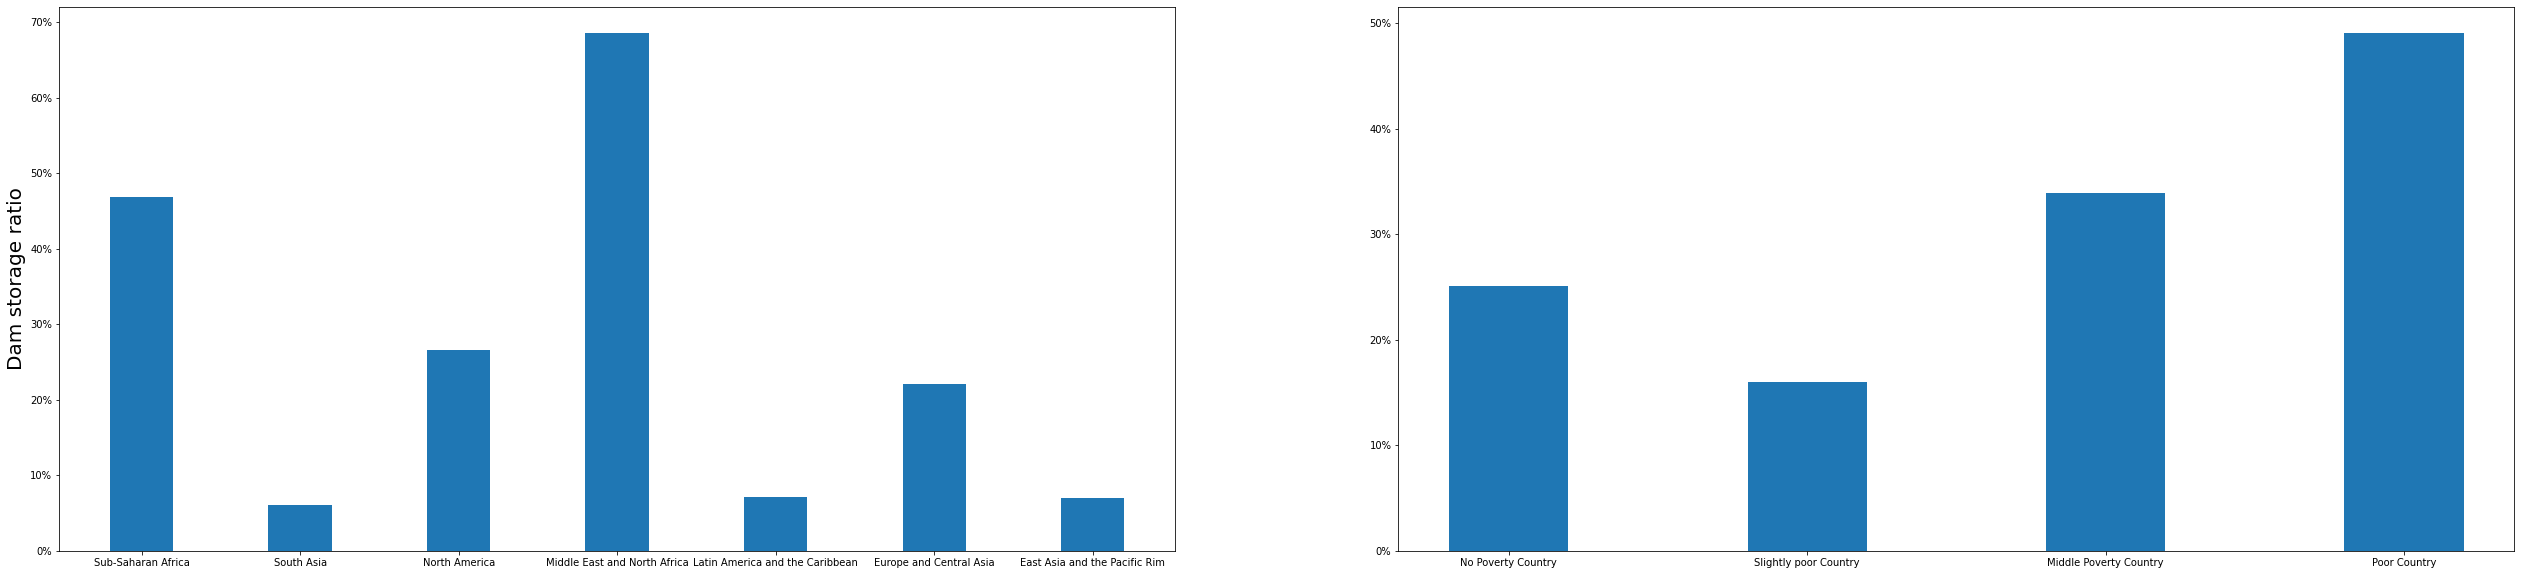

In [25]:
def get_histogram(factor, if_percent=False):
    _, _, data_region, data_poor = histogram(factor)

    key_region = []
    value_region = []
    for key in data_region.keys():
        key_region.append(key)
        value_region.append(data_region[key])
    # print(key_region)
    # print(value_region)

    key_poor = []
    value_poor = []
    for key in data_poor.keys():
        key_poor.append(key)
        value_poor.append(data_poor[key])

    def to_percent(temp, position):
        return '%1.0f'%(100*temp) + '%'

    plt.figure(figsize = (44,10))

    plt.subplot(1,2,1)
    if if_percent:
        plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
    plt.bar(range(len(value_region)), value_region, tick_label=key_region, width = 0.4) 
    plt.ylabel(factor, size=20)

    plt.subplot(1,2,2)
    if if_percent:
        plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
    plt.bar(range(len(value_poor)), value_poor, tick_label=key_poor, width = 0.4)

    plt.show()


get_histogram('GDP per capita')
get_histogram('Water resource utilisation',True)
get_histogram('Renewable water resource per capita')
get_histogram('Hydropower generation per capita')
get_histogram('Dam capacity per capita')
get_histogram('Dam storage ratio',True)

In [27]:
# Jenks natural break point method
import jenkspy

data = pd.read_csv('./dataset/data_for_analysis.csv',usecols=['GDP per capita','Water resource utilisation','Renewable water resource per capita','Hydropower generation per capita','Dam capacity per capita','Dam storage ratio'])

list_gdp = np.array(data['GDP per capita']).tolist()
list_water = np.array(data['Water resource utilisation']).tolist()
list_renewable = np.array(data['Renewable water resource per capita']).tolist()
list_hydropower = np.array(data['Hydropower generation per capita']).tolist()
list_dam = np.array(data['Dam capacity per capita']).tolist()
list_storage = np.array(data['Dam storage ratio']).tolist()

breaks1 = jenkspy.jenks_breaks(list_gdp, n_classes=4)
breaks2 = jenkspy.jenks_breaks(list_water, n_classes=4)
breaks3 = jenkspy.jenks_breaks(list_renewable, n_classes=4)
breaks4 = jenkspy.jenks_breaks(list_hydropower, n_classes=4)
breaks5 = jenkspy.jenks_breaks(list_dam, n_classes=4)
breaks6 = jenkspy.jenks_breaks(list_storage, n_classes=4)
print(breaks1)
print(breaks2)
print(breaks3)
print(breaks4)
print(breaks5)
print(breaks6)

[98.44, 12234.1, 35163.57, 62981.39, 120137.96]
[0.0, 0.42, 1.0, 1.35, 15.33]
[0.0, 18.54, 48.8, 113.98, 248.3]
[0, 1292, 3814, 6516, 10559]
[0.03, 0.82, 2.1, 3.81, 5.75]
[0.0, 0.2178, 0.7091, 1.4808, 2.2727]


In [28]:
# data discretization
# ['GDP per capita','Water resource utilisation','Renewable water resource per capita','Hydropower generation per capita','Dam capacity per capita','Dam storage ratio']
def discretization(divisor, value):
    result = ''
    # 1
    if divisor=='GDP per capita':
        if value<=breaks1[1]:
            result='gdp_0'
        elif breaks1[1]<=value<=breaks1[2]:
            result='gdp_1'
        elif breaks1[2]<=value<=breaks1[3]:
            result='gdp_2'
        elif breaks1[3]<=value<=breaks1[4]:
            result='gdp_3'
    # 2
    if divisor=='Water resource utilisation':
        if value<=breaks2[1]:
            result='water_resource_0'
        elif breaks2[1]<=value<=breaks2[2]:
            result='water_resource_1'
        elif breaks2[2]<=value<=breaks2[3]:
            result='water_resource_2'
        elif breaks2[3]<=value<=breaks2[4]:
            result='water_resource_3'
    # 3
    if divisor=='Renewable water resource per capita':
        if value<=breaks3[1]:
            result='renewable_water_0'
        elif breaks3[1]<=value<=breaks3[2]:
            result='renewable_water_1'
        elif breaks3[2]<=value<=breaks3[3]:
            result='renewable_water_2'
        elif breaks3[3]<=value<=breaks3[4]:
            result='renewable_water_3'
    # 4
    if divisor=='Hydropower generation per capita':
        if value<=breaks4[1]:
            result='hydropower_0'
        elif breaks4[1]<=value<=breaks4[2]:
            result='hydropower_1'
        elif breaks4[2]<=value<=breaks4[3]:
            result='hydropower_2'
        elif breaks4[3]<=value<=breaks4[4]:
            result='hydropower_3'
    # 5
    if divisor=='Dam capacity per capita':
        if value<=breaks5[1]:
            result='dam_capacity_0'
        elif breaks5[1]<=value<=breaks5[2]:
            result='dam_capacity_1'
        elif breaks5[2]<=value<=breaks5[3]:
            result='dam_capacity_2'
        elif breaks5[3]<=value<=breaks5[4]:
            result='dam_capacity_3'
    # 6
    if divisor=='Dam storage ratio':
        if value<=breaks6[1]:
            result='dam_storage_0'
        elif breaks6[1]<=value<=breaks6[2]:
            result='dam_storage_1'
        elif breaks6[2]<=value<=breaks6[3]:
            result='dam_storage_2'
        elif breaks6[3]<=value<=breaks6[4]:
            result='dam_storage_3'

    return result

In [29]:
# apriori algorithm
def apriori_arith(data_for_analysis, sup, conf):
    min_sup = sup
    min_conf = conf
    K = 3


    # apriori
    def apriori():

        data_set = load_data()

        C1 = create_C1(data_set)
        item_count = count_itemset1(data_set, C1)

        L1 = generate_L1(item_count)

        Lk_copy = L1.copy()
        L = []
        L.append(Lk_copy)
        for i in range(2, K + 1):
            Ci = create_Ck(Lk_copy, i)
            Li = generate_Lk_by_Ck(Ci, data_set)
            Lk_copy = Li.copy()
            L.append(Lk_copy)

        print('rule group\tSupport Number')
        support_data = {}
        for item in L:
            for i in item:
                print(list(i), '\t', item[i])
                support_data[i] = item[i]

        strong_rules_list = generate_strong_rules(L, support_data, data_set)
        strong_rules_list.sort(key=lambda result: result[2], reverse=True)
        print("\nStrong association rule\nX\t\tY\t\t\tconfdence")
        for item in strong_rules_list:
            print(list(item[0]), "\t", list(item[1]), "\t", item[2])

    def load_data():
        data = data_for_analysis
        data_set = []
        for key in data:
            item = data[key].split(',')
            data_set.append(item)
        return data_set

    def create_C1(data_set):
        C1 = set()
        for t in data_set:
            for item in t:
                item_set = frozenset([item])
                C1.add(item_set)
        return C1

    def count_itemset1(data_set, C1):
        item_count = {}
        for data in data_set:
            for item in C1:
                if item.issubset(data):
                    if item in item_count:
                        item_count[item] += 1
                    else:
                        item_count[item] = 1
        return item_count

    def generate_L1(item_count):
        L1 = {}
        for i in item_count:
            if item_count[i] >= min_sup:
                L1[i] = item_count[i]
        return L1

    def is_apriori(Ck_item, Lk_copy):
        for item in Ck_item:
            sub_Ck = Ck_item - frozenset([item])
            if sub_Ck not in Lk_copy:
                return False
        return True

    def create_Ck(Lk_copy, k):
        Ck = set()
        len_Lk_copy = len(Lk_copy)
        list_Lk_copy = list(Lk_copy)
        for i in range(len_Lk_copy):
            for j in range(1, len_Lk_copy):
                l1 = list(list_Lk_copy[i])
                l2 = list(list_Lk_copy[j])
                l1.sort()
                l2.sort()
                if l1[0:k-2] == l2[0:k-2]:
                    Ck_item = list_Lk_copy[i] | list_Lk_copy[j]
                    if is_apriori(Ck_item, Lk_copy):
                        Ck.add(Ck_item)
        return Ck


    def generate_Lk_by_Ck(Ck, data_set):
        item_count = {}
        for data in data_set:
            for item in Ck:
                if item.issubset(data):
                    if item in item_count:
                        item_count[item] += 1
                    else:
                        item_count[item] = 1
        Lk2 = {}
        for i in item_count:
            if item_count[i] >= min_sup:
                Lk2[i] = item_count[i]
        return Lk2


    def generate_strong_rules(L, support_data, data_set):
        strong_rule_list = []
        sub_set_list = []
        for i in range(0, len(L)):
            for freq_set in L[i]:
                for sub_set in sub_set_list:
                    if sub_set.issubset(freq_set):
                        sub_set_num = 0
                        for item in data_set:
                            if (freq_set - sub_set).issubset(item):
                                sub_set_num += 1
                        conf = support_data[freq_set] / sub_set_num
                        strong_rule = (freq_set - sub_set, sub_set, conf)
                        if conf >= min_conf and strong_rule not in strong_rule_list:
                            strong_rule_list.append(strong_rule)
                sub_set_list.append(freq_set)
        return strong_rule_list


    if __name__ == '__main__':
        apriori()

In [30]:
def get_association(factors_for_analysis):
    data_for_analysis = {}
    
    for i in range(len(csv_data)):
        country = csv_data['Country'][i]
        val = ''
        for factor in factors_for_analysis:
            v = csv_data[factor][i]
            r = discretization(factor,v)
            val = val + str(r)+','
        val = val.strip(',')
        data_for_analysis[str(country)] = val
        # break
    
    # print(data_for_analysis)
    return data_for_analysis

In [31]:
apriori_arith(get_association(['GDP per capita','Renewable water resource per capita','Dam capacity per capita']),20,0.75)

rule group	Support Number
['renewable_water_0'] 	 115
['dam_capacity_0'] 	 108
['gdp_0'] 	 118
['dam_capacity_1'] 	 29
['renewable_water_1'] 	 21
['dam_capacity_2'] 	 20
['gdp_1'] 	 21
['gdp_0', 'dam_capacity_0'] 	 92
['gdp_0', 'renewable_water_0'] 	 88
['dam_capacity_0', 'renewable_water_0'] 	 78
['dam_capacity_1', 'renewable_water_0'] 	 20
['gdp_0', 'dam_capacity_0', 'renewable_water_0'] 	 67

Strong association rule
X		Y			confdence
['dam_capacity_0', 'renewable_water_0'] 	 ['gdp_0'] 	 0.8589743589743589
['dam_capacity_0'] 	 ['gdp_0'] 	 0.8518518518518519
['gdp_0'] 	 ['dam_capacity_0'] 	 0.7796610169491526
['renewable_water_0'] 	 ['gdp_0'] 	 0.7652173913043478
['gdp_0', 'renewable_water_0'] 	 ['dam_capacity_0'] 	 0.7613636363636364


In [32]:
apriori_arith(get_association(['GDP per capita','Renewable water resource per capita','Dam storage ratio']),20,0.7)

rule group	Support Number
['renewable_water_0'] 	 115
['dam_storage_0'] 	 109
['gdp_0'] 	 118
['dam_storage_1'] 	 29
['renewable_water_1'] 	 21
['gdp_1'] 	 21
['renewable_water_0', 'dam_storage_0'] 	 65
['gdp_0', 'renewable_water_0'] 	 88
['gdp_0', 'dam_storage_0'] 	 76
['renewable_water_0', 'dam_storage_1'] 	 28
['gdp_0', 'dam_storage_1'] 	 22
['renewable_water_1', 'dam_storage_0'] 	 20
['gdp_0', 'renewable_water_0', 'dam_storage_0'] 	 46
['gdp_0', 'renewable_water_0', 'dam_storage_1'] 	 22

Strong association rule
X		Y			confdence
['gdp_0', 'dam_storage_1'] 	 ['renewable_water_0'] 	 1.0
['dam_storage_1'] 	 ['renewable_water_0'] 	 0.9655172413793104
['renewable_water_1'] 	 ['dam_storage_0'] 	 0.9523809523809523
['renewable_water_0', 'dam_storage_1'] 	 ['gdp_0'] 	 0.7857142857142857
['renewable_water_0'] 	 ['gdp_0'] 	 0.7652173913043478
['dam_storage_1'] 	 ['gdp_0'] 	 0.7586206896551724
['dam_storage_1'] 	 ['gdp_0', 'renewable_water_0'] 	 0.7586206896551724
['gdp_0'] 	 ['renewable_wate

In [33]:
apriori_arith(get_association(['GDP per capita','Hydropower generation per capita','Renewable water resource per capita']),20,0.75)

rule group	Support Number
['hydropower_0'] 	 125
['renewable_water_0'] 	 115
['gdp_0'] 	 118
['renewable_water_1'] 	 21
['gdp_1'] 	 21
['renewable_water_0', 'hydropower_0'] 	 91
['gdp_0', 'renewable_water_0'] 	 88
['gdp_0', 'hydropower_0'] 	 97
['gdp_0', 'renewable_water_0', 'hydropower_0'] 	 71

Strong association rule
X		Y			confdence
['gdp_0'] 	 ['hydropower_0'] 	 0.8220338983050848
['gdp_0', 'renewable_water_0'] 	 ['hydropower_0'] 	 0.8068181818181818
['renewable_water_0'] 	 ['hydropower_0'] 	 0.7913043478260869
['renewable_water_0', 'hydropower_0'] 	 ['gdp_0'] 	 0.7802197802197802
['hydropower_0'] 	 ['gdp_0'] 	 0.776
['renewable_water_0'] 	 ['gdp_0'] 	 0.7652173913043478


In [34]:
apriori_arith(get_association(['GDP per capita','Water resource utilisation','Renewable water resource per capita']),20,0.7)

rule group	Support Number
['water_resource_0'] 	 70
['renewable_water_0'] 	 115
['gdp_0'] 	 118
['water_resource_1'] 	 83
['renewable_water_1'] 	 21
['gdp_1'] 	 21
['water_resource_0', 'gdp_0'] 	 69
['gdp_0', 'renewable_water_0'] 	 88
['water_resource_0', 'renewable_water_0'] 	 52
['water_resource_1', 'renewable_water_0'] 	 56
['gdp_0', 'water_resource_1'] 	 46
['water_resource_0', 'gdp_0', 'renewable_water_0'] 	 51
['water_resource_1', 'gdp_0', 'renewable_water_0'] 	 34

Strong association rule
X		Y			confdence
['water_resource_0'] 	 ['gdp_0'] 	 0.9857142857142858
['water_resource_0', 'renewable_water_0'] 	 ['gdp_0'] 	 0.9807692307692307
['renewable_water_0'] 	 ['gdp_0'] 	 0.7652173913043478
['gdp_0'] 	 ['renewable_water_0'] 	 0.7457627118644068
['water_resource_0'] 	 ['renewable_water_0'] 	 0.7428571428571429
['water_resource_0', 'gdp_0'] 	 ['renewable_water_0'] 	 0.7391304347826086
['gdp_0', 'water_resource_1'] 	 ['renewable_water_0'] 	 0.7391304347826086
['water_resource_0'] 	 ['gd